<a href="https://colab.research.google.com/github/ASTRONOE/Common_Data_Analysis/blob/KreativStorm/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analysis Hands-On Program - KreativStorm**
##WEEK 4 ASSIGNMENT
###**Main Research Question: How do pick-up lines and a person’s scent influence relationship initiation?**

In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=e1a1e5e51a911bdb9f412bed95d645d16c8298329d199d271cb0dfc286a94b76
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pandas as pd
import seaborn as sb
import pyreadstat as prs
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from google.colab import files
from scipy.stats import ttest_ind, f_oneway, levene, shapiro, boxcox, chi2_contingency, kurtosis, variation, mannwhitneyu, median_test

In [ ]:
pufile = files.upload()

Saving PickUpLines.sav to PickUpLines.sav


In [ ]:
Df, meta = prs.read_sav("PickUpLines.sav")
Df = Df.drop(columns=['ParticipantNumber', 'Contraceptive', 'filter_$'])

In [ ]:
#print dataframe summary
print(Df.shape)
print(Df.info())

(194, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PickUp        194 non-null    float64
 1   Scent         194 non-null    float64
 2   Receptivity   194 non-null    float64
 3   Gender        194 non-null    float64
 4   Age           194 non-null    float64
 5   Ethnicity     194 non-null    float64
 6   YearInSchool  194 non-null    float64
dtypes: float64(7)
memory usage: 10.7 KB
None


In [ ]:
# Accessing the variable names
print("Variable names:\n", meta.column_names)

# Accessing the variable labels
print("Variable labels:\n", meta.variable_value_labels)

# Accessing the detailed information about each variable
print("Variable information:")
print(meta.column_names_to_labels)

Variable names:
 ['ParticipantNumber', 'PickUp', 'Scent', 'Receptivity', 'Gender', 'Age', 'Ethnicity', 'YearInSchool', 'Contraceptive', 'filter_$']
Variable labels:
 {'PickUp': {1.0: 'Cute-Direct (Experimental Condition)', 2.0: 'Direct-Direct (Control Condition)'}, 'Scent': {1.0: 'Spray (Experimental Condition)', 2.0: 'No Spray (Control Condition)'}, 'Gender': {1.0: 'male', 2.0: 'female'}, 'Ethnicity': {1.0: 'eastern or asian', 2.0: 'black or african', 3.0: 'hispanic, latino, spanish', 4.0: 'white or european', 5.0: 'other'}, 'YearInSchool': {1.0: 'freshman', 2.0: 'sophomore', 3.0: 'junior', 4.0: 'senior'}, 'Contraceptive': {1.0: 'No', 2.0: 'Yes'}, 'filter_$': {0.0: 'Not Selected', 1.0: 'Selected'}}
Variable information:
{'ParticipantNumber': None, 'PickUp': None, 'Scent': None, 'Receptivity': None, 'Gender': None, 'Age': None, 'Ethnicity': None, 'YearInSchool': None, 'Contraceptive': None, 'filter_$': 'Contraceptive = 1 (FILTER)'}


In [ ]:
Df.head()

,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool
0,1.0,2.0,3.25424,2.0,21.0,4.0,2.0
1,1.0,1.0,4.43760,2.0,19.0,4.0,3.0
2,1.0,1.0,4.43760,2.0,21.0,4.0,1.0
3,1.0,1.0,3.91988,2.0,19.0,4.0,3.0
4,2.0,2.0,3.99384,2.0,20.0,1.0,2.0


**RQ1: Is there any evidence to suggest that the cute-direct pick-up approach will lead to more relationship receptivity than the direct-direct approach?**
---

`1. What is your dependent variable?`

`Answer`

Receptivity is the dependent variable as required by the question. The goal of every pick up is to get a mate or date. Certain factors determine how the recepeint will respond. The factors involved are among the independent variables.

`2. What is(are) your independent variable(s)?`

`Answer`

The pick up is the independent variable in this context of the research question.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

cute_direct_data = Df[Df['PickUp'] == 1.0]['Receptivity']
direct_direct_data = Df[Df['PickUp'] == 2.0]['Receptivity']

sb.boxplot(data=Df, x='PickUp', y='Receptivity', ax=ax[1])
sb.violinplot(data=Df, x='PickUp', y='Receptivity', ax=ax[2])

# Create overlaid histogram plots
ax[0].hist(cute_direct_data, bins=20, alpha=0.5, label='Cute-Direct Pick-Up')
ax[0].hist(direct_direct_data, bins=20, alpha=0.5, label='Direct-Direct Pick-Up')

# Add labels and legend
ax[0].set_xlabel('Receptivity')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Show the plot
plt.suptitle('Distribution of Receptivity by Pickup Group')
plt.legend()

In [ ]:
Df.head()

,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool
0,1.0,2.0,3.25424,2.0,21.0,4.0,2.0
1,1.0,1.0,4.43760,2.0,19.0,4.0,3.0
2,1.0,1.0,4.43760,2.0,21.0,4.0,1.0
3,1.0,1.0,3.91988,2.0,19.0,4.0,3.0
4,2.0,2.0,3.99384,2.0,20.0,1.0,2.0


In [ ]:
print(Df[Df['PickUp'] == 1.0]['Receptivity'].mean())
print(Df[Df['PickUp'] == 2.0]['Receptivity'].mean())

3.863434
3.6544516216216207


In [ ]:
(Df.PickUp == 1).var()

0.23716681801185832

<Axes: ylabel='Frequency'>

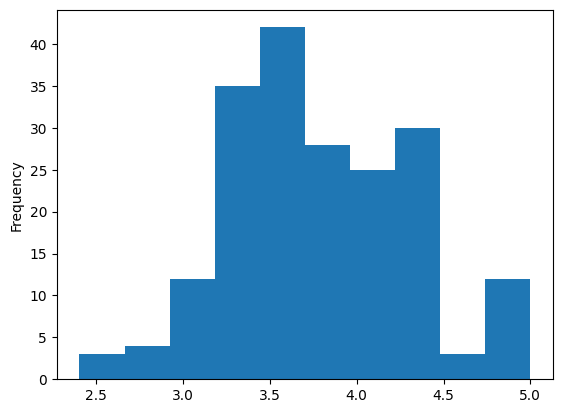

In [ ]:
Df.Receptivity.plot.hist()

Both the standard one-way ANOVA and the Welch ANOVA agree that there is difference between both means.

In [ ]:
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(Df['Receptivity'])

print("Shapiro-Wilk test statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: Data is not normally distributed.")
else:
  print("Fail to reject the null hypothesis: Data is normally distributed.")

Shapiro-Wilk test statistic: 0.9844916462898254
P-value: 0.03101087361574173
Reject the null hypothesis: Data is not normally distributed.


In [ ]:
# Original Receptivity data

# Apply Box-Cox transformation
receptivity_transformed, lambda_value = boxcox(Df['Receptivity'])

Df['Receptivity_T'] = receptivity_transformed

# Print the lambda value used for transformation
print("Lambda value:", lambda_value)

# Now you can use the transformed data for analysis


Lambda value: 0.34351158278149607


`3. Are the scores in each cell independent? `

In [ ]:
# Load your dataset into a DataFrame named 'df'
# Make sure you have dropped the 'Contraceptive' and 'filter_$' columns

# Separate the 'Receptivity' data for the two 'PickUp' choices
receptivity_pickup_1 = Df[Df['PickUp'] == 1.0]['Receptivity_T']
receptivity_pickup_2 = Df[Df['PickUp'] == 2.0]['Receptivity_T']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(receptivity_pickup_1, receptivity_pickup_2, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: There is a significant difference in means.")
else:
  print("Fail to reject the null hypothesis: Means are not significantly different.")


T-statistic: 2.7192399643435032
P-value: 0.007403621475660464
Reject the null hypothesis: There is a significant difference in means.


In [ ]:
cute_direct = Df[Df['PickUp'] == 1]['Receptivity_T']
direct_direct = Df[Df['PickUp'] == 2]['Receptivity_T']

statistic, p_value = mannwhitneyu(cute_direct, direct_direct, alternative='two-sided')
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

adjusted_alpha = 0.05 / len(Df['PickUp'].unique())  # Number of comparisons
print("Adjusted alpha:", adjusted_alpha)

# Check if p-value is significant after Bonferroni correction
if p_value < adjusted_alpha:
  print("Reject the null hypothesis: There is a significant difference between groups.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between groups.")

Mann-Whitney U test statistic: 5352.5
P-value: 0.016296580430660665
Adjusted alpha: 0.025
Reject the null hypothesis: There is a significant difference between groups.


In [ ]:
print(cute_direct.var())
print(direct_direct.var())
print(direct_direct.var() - cute_direct.var())

0.04104586377383583
0.05787596379657918
0.01683010002274335


In [ ]:
print(cute_direct.mean())
print(direct_direct.mean())
print(cute_direct.mean() - direct_direct.mean())

1.7116226008527278
1.6204507189623985
0.09117188189032932


After checking the necessary assumptions, I conducted two independent t-tests to compare the means of the two PickUp groups. The mean for PickUp group 1 was found to be mean (M = 1.71) with a variance of (var = 0.041), while for group 2, the mean was M = 1.62 with a variance of var = 0.057.

Upon applying the Welch's t-test, I obtained a test statistic of t(F = 2.72) and a corresponding p-value of p = 0.007 < (0.05). Consequently, H0 is rejected in favor of H1.

Additionally, the Mann-Whitney U test was conducted, taking into account an adjusted alpha level due to Bonferroni correction. With an adjusted alpha of 0.25, the computed test statistic was U = 5352.5 and the associated p-value was p = 0.01, which exceeds the adjusted significance level of 0.025. Despite being a non-parametric test, the result still indicates the rejection of the null hypothesis in support of the alternative hypothesis.

In both instances, the p-values obtained from these tests demonstrated a violation of the null hypothesis (H0) and provided support for the alternative hypothesis (H1). Thus, it can be confidently concluded that there exists a statistically significant difference in means between the two PickUp groups, signifying their independence.

<Axes: ylabel='Frequency'>

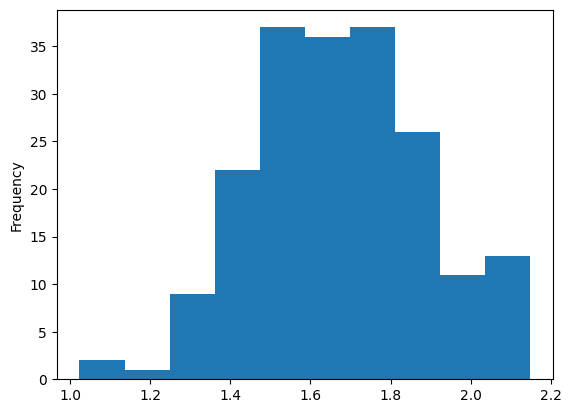

In [ ]:
Df['Receptivity_T'].plot.hist()

In [ ]:
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(Df['Receptivity_T'])

print("Shapiro-Wilk test statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: Data is not normally distributed.")
else:
  print("Fail to reject the null hypothesis: Data is normally distributed.")

Shapiro-Wilk test statistic: 0.9892567992210388
P-value: 0.15320268273353577
Fail to reject the null hypothesis: Data is normally distributed.


`4. Are there any significant outliers?`

In [ ]:
mean_receptivity = Df['PickUp'].mean()
std_receptivity = Df['PickUp'].std()

# Calculate z-scores for 'Receptivity'
Df['Z_Score'] = (Df['PickUp'] - mean_receptivity) / std_receptivity

# Set the z-score threshold for identifying outliers (e.g., 3)
z_score_threshold = 3

# Identify outliers based on z-scores
outliers = Df[abs(Df['Z_Score']) > z_score_threshold]

print("Identified Outliers:")
print(outliers)


Identified Outliers:
Empty DataFrame
Columns: [PickUp, Scent, Receptivity, Gender, Age, Ethnicity, YearInSchool, Receptivity_T, Z_Score]
Index: []


`Answer`

I drew violinplots, boxplots and calculated z-score and found no datapoint to exceed the 75th quartile or 3 standard deviations, z > 3SD from the mean.

`5. How is your dependent variable distributed in each cell?`

PickUp Group 1.0:
Mean: 3.863434
Standard Deviation: 0.4988286831064828
Variance: 0.24883005508974784

PickUp Group 2.0:
Mean: 3.6544516216216207
Standard Deviation: 0.5587985168394703
Variance: 0.31225578242199187



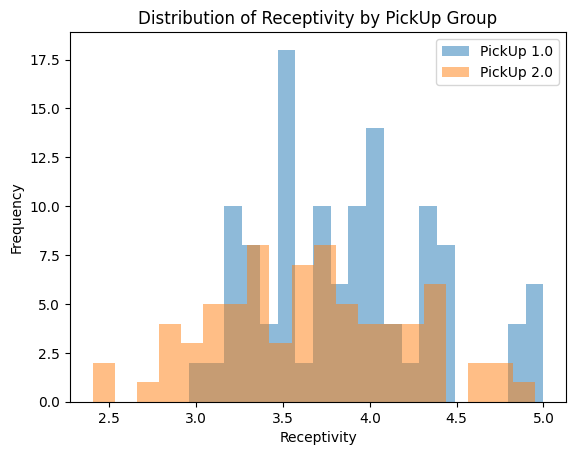

In [ ]:
# Calculate mean, standard deviation, and variance for each PickUp group
pickup_groups = Df['PickUp'].unique()
for group in pickup_groups:
  group_data = Df[Df['PickUp'] == group]['Receptivity']
  group_mean = group_data.mean()
  group_std = group_data.std()
  group_var = group_data.var()

  print(f"PickUp Group {group}:")
  print(f"Mean: {group_mean}")
  print(f"Standard Deviation: {group_std}")
  print(f"Variance: {group_var}")
  print()

  # Create a histogram for each PickUp group
  plt.hist(group_data, bins=20, alpha=0.5, label=f'PickUp {group}')

# Add labels and legend to the histogram
plt.xlabel('Receptivity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Receptivity by PickUp Group')
plt.show()


In [ ]:
cute_pickup = Df[Df.PickUp == 1]['Receptivity']
direct_pickup = Df[Df.PickUp == 2]['Receptivity']

score, p = shapiro(cute_pickup)
print('Shapiro score:', score, '\np-value:', p)

score, p = shapiro(direct_pickup)
print('Shapiro score:', score, '\np-value:', p)

Shapiro score: 0.9578617215156555 
p-value: 0.000855224730912596
Shapiro score: 0.9907622933387756 
p-value: 0.8713902235031128


In [ ]:
# Calculate kurtosis for each PickUp group
pickup_groups = Df['PickUp'].unique()
for group in pickup_groups:
  group_data = Df[Df['PickUp'] == group]['Receptivity']
  kurt = kurtosis(group_data)
  print(f"Kurtosis for PickUp {group}: {kurt}")

# Calculate coefficient of variation for each PickUp group
for group in pickup_groups:
  group_data = Df[Df['PickUp'] == group]['Receptivity']
  coeff_var = variation(group_data)
  print(f"Coefficient of Variation for PickUp {group}: {coeff_var}")


Kurtosis for PickUp 1.0: -0.29101706176136055
Kurtosis for PickUp 2.0: -0.49228827307618017
Coefficient of Variation for PickUp 1.0: 0.12857625677401582
Coefficient of Variation for PickUp 2.0: 0.151872309747558


`Answer`

I used two methods to examine the shape of the distribution of both groups: a violin plot and a Shapiro-Wilk test

For the cute-direct group, it is an aymmetric (skewed) distribution. It expectedly fails the Shapiro-Wilk normality test (S-W = 0.95, p = 0.00085 < (0.05)). H0 is violated.

On the contrary, the direct_direct group, it is an aymmetric (skewed) distribution. It expectedly passess the Shapiro-Wilk normality test (S-W = 0.99, p = 0.87 > (0.05)). H0 is passed.

`6. Do you need to perform any transformations?`

`Answer`

I performed a boxcox transformation (lambda=0.3) on the dependent variable because I noticed that the Receptivity distribution is not normally distributed according to the Shapiro-Wilk test (S-W score = 0.98, p = 0.031 < (0.05)).  it was not normally distributed.

As for the independent variables, I did not see a need to transform the data but decided to compensate using non-parametric tests.

`7. Is there homogeneity or heterogeneity of variance?`

In [ ]:
# Assuming you have a DataFrame named 'df' and columns 'PickUp' and 'Receptivity'
cute_direct = Df[Df['PickUp'] == 1.0]['Receptivity_T']
direct_direct = Df[Df['PickUp'] == 2.0]['Receptivity_T']

# Perform Levene's test
statistic, p_value = levene(cute_direct, direct_direct, center='median')

print("Levene's test statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: Variances are not equal.")
else:
  print("Fail to reject the null hypothesis: Variances are equal.")


Levene's test statistic: 2.358728188416729
P-value: 0.12622997000146413
Fail to reject the null hypothesis: Variances are equal.


`Answer`

I carried out the Levene test among the groups and arrived at the Levene scores (L = 2.35, p = 0.12). This means we can accept H0 and say that the variances are equal or homogeneous.

However, I conducted a Levene test again using median as the centre to compensate for the possible presence of failed normality in the data. This transforms the Levene test to a Brown-Forsythe test. When executed, I did not get a different result.

`8. What is the mean score of receptivity in the experimental condition?`

In [ ]:
Df[Df['PickUp'] == 1.0]['Receptivity'].mean()
#print("Mean Receptivity in Experimental Condition:", mean_receptivity_experimental)

3.863434

`Answer` 3.86

`9. What is the mean score of receptivity in the control condition?`

In [ ]:
Df[Df['PickUp'] == 2.0]['Receptivity'].mean()
#print("Mean Receptivity in Experimental Condition:", mean_receptivity_experimental)

3.6544516216216207

`Answer` 3.65

`10. What is your answer to RQ1? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions.`

In [ ]:
spray = Df[Df['PickUp'] == 1]['Receptivity_T']
nospray = Df[Df['PickUp'] == 2]['Receptivity_T']

# Assuming 'Df' is your DataFrame and 'Receptivity_T' is the transformed receptivity column
grouped_data = [spray, nospray]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: There is a significant difference between groups.")
else:
  print("Fail to reject the null hypothesis: No significant difference between groups.")

# Calculate degrees of freedom
df_between = len(grouped_data) - 1
df_within = len(Df['Receptivity_T']) - len(grouped_data)

# Calculate eta-squared (effect size)
ss_between = df_between * f_statistic / df_within
eta_squared = ss_between / (ss_between + f_statistic)

print("Degrees of freedom (between):", df_between)
print("Degrees of freedom (within):", df_within)
print("Eta-squared (effect size):", eta_squared)

One-way ANOVA results:
F-statistic: 8.01944623959719
P-value: 0.005121220560347551
Reject the null hypothesis: There is a significant difference between groups.
Degrees of freedom (between): 1
Degrees of freedom (within): 192
Eta-squared (effect size): 0.005181347150259067


In [ ]:
# Perform Welch's ANOVA
welch_result = pg.welch_anova(data=Df, dv='Receptivity_T', between='PickUp')

print("Welch's ANOVA results:")
print(welch_result)

Welch's ANOVA results:
   Source  ddof1       ddof2         F     p-unc       np2
0  PickUp      1  134.977334  7.394266  0.007404  0.040093


VARIABLE DESCRIPTION

The dependent variable is the 'Receptivity' Y feature whose values are continuous. It describes the degree of willingness a prospective partner is willing to accept the proposing party.

The independent variable is the PickUp variable whose values are discrete and binary. It has values, 'cute direct' X1 and 'direct-direct' X2 which describes the method used by the proposing partner to attract his mate.

ASSUMPTIONS

Normality:- Four methods were applied to test for normality: histogram plots, violinplots, boxplots, and Shapiro-Wilk test. Of the three variables involved, only the direct-direct cell passed the H0 for normality test, X2 = (S-W = 0.99, p = 0.87). Receptivity and the cute-direct approach were skewed and only passed H1. Y = (S-W = 0.98, p = 0.03), X1 = (S-W = 0.95, 0.008). We later used a boxcox transformation to normalize the dependent variable.

Outliers:- Three methods were applied to test for outliers: violinplot, boxplots, and z-scores. The results were unanimously negative for outliers for PickUp groups and Receptivity. z < 3SD.

Homogeneity: The Levene test was chosen to test for homogeneity of variance. To compensate for the discrepancies in variance, a median test was applied to the centre (or Brown-forsythe test), the result was that H0 was respected, (L = 2.35, p = 0.12). This means that the variance was the same between both groups.


Independence: The t-test was chosen to test for independence. The standard Student t-test gave us a t-score (t = 2.7, p = 0.007 < (0.05)). This means that we reject H0, and declare that there is a difference in the mean of both groups. Furthermore, a non-parametric test, Mann-Whitney U-test added to the confirmation with scores (U = 5342, p = 0.016 < (adj. 0.025))

ANOVA

Finally, I decided to apply the one-way ANOVA to the data, and I got the results (ddf = 192, F = 8.01, p = 0.005 < (0.05), np2 = 0.005. However, not all the prerequisite assumptions were met. X1 failed the normality test. Given that situation, plus considering the size of our sample, we decided to apply Welch ANOVA for extra confirmation. The results of the ANOVA were (dof = 134.9, F = 7.39, p = 0.007 < (0.05), np2 = 0.04), which concurs with the metrics from the one-way ANOVA.

CONCLUSION

The F-value and p-value from the ANOVA enabled me to deduce that there is a significant difference between the receptivity in the two groups, with X1 having higher mean and lower variance, (dM = 0.091, dvar = 0.016), with an effect size of 4% to account for the variation between both groups.

The answer to the research question is that the cute-direct approach is more attractive than the direct-direct approach by an effect size of 4%.




---


### **RQ2: Is there any evidence to suggest that the presence of androstadienone spray will lead to more relationship receptivity than no spray?**

---

`11. What is your dependent variable?`

`Answer`

Receptivity is the dependent variable. The main research question is about it. The goal of every pick up is to get a mate. Certain factors determine how the recepeint will respond. The factors involved are the independent variables.

`12. What is(are) your independent variable(s)?`

The scent is the chosen independent variable because it has an effect on the attractive of a proposing partner to a potential mate. Like the PickUp variable, it consists of two binary values to signify those who spray perfume before approaching their desired partners, and those who do not.

`13. Are the scores in each cell independent?`

In [ ]:
# Separate the 'Receptivity' data for the two 'PickUp' choices
receptivity_spray = Df[Df['Scent'] == 1.0]['Receptivity_T']
receptivity_nospray = Df[Df['Scent'] == 2.0]['Receptivity_T']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(receptivity_spray, receptivity_nospray)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: There is a significant difference in means.")
else:
  print("Fail to reject the null hypothesis: Means are not significantly different.")


T-statistic: 1.883086801350598
P-value: 0.06120069477592636
Fail to reject the null hypothesis: Means are not significantly different.


In [ ]:
spray = Df[Df['Scent'] == 1]['Receptivity_T']
no_spray = Df[Df['Scent'] == 2]['Receptivity_T']

statistic, p_value = mannwhitneyu(spray, no_spray, alternative='two-sided')
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 5403.5
P-value: 0.06360956103741593


In [ ]:
print(spray.mean())
print(no_spray.mean())
print(spray.mean() - no_spray.mean())

1.7045520930429912
1.6448294181008192
0.05972267494217198


In [ ]:
print(spray.var())
print(no_spray.var())
print(spray.var() - no_spray.var())

0.06276746788137291
0.03205332849417453
0.030714139387198386


`Answer`

I applied a Student t-test in an endeavour to discover the distinction between means of the variable groups sprayers (M = 3.85, var = 0.36), and non-sprayers (M = 3.69, 0.17). The result of the t-test showed that the t-score (t = 1.88, p = 0.06 > (0.05)) agrees with H0. This means that there is no independence of the means.

To compensate for possible deviations from normality, we attempt a non-parametric U-test for better confirmation. The result (U = 5403.2, p = 0.063) which also agrees with H0. Consequently, we reject H1 and accept that there is no independence between both groups.

In [ ]:
Df.Scent.value_counts()

1.0    104
2.0     90
Name: Scent, dtype: int64

In [ ]:
print(Df[Df.Scent == 1.0]['Receptivity'].var())
print(Df[Df.Scent == 2.0]['Receptivity'].var())

0.3637162292228528
0.17687335949508115


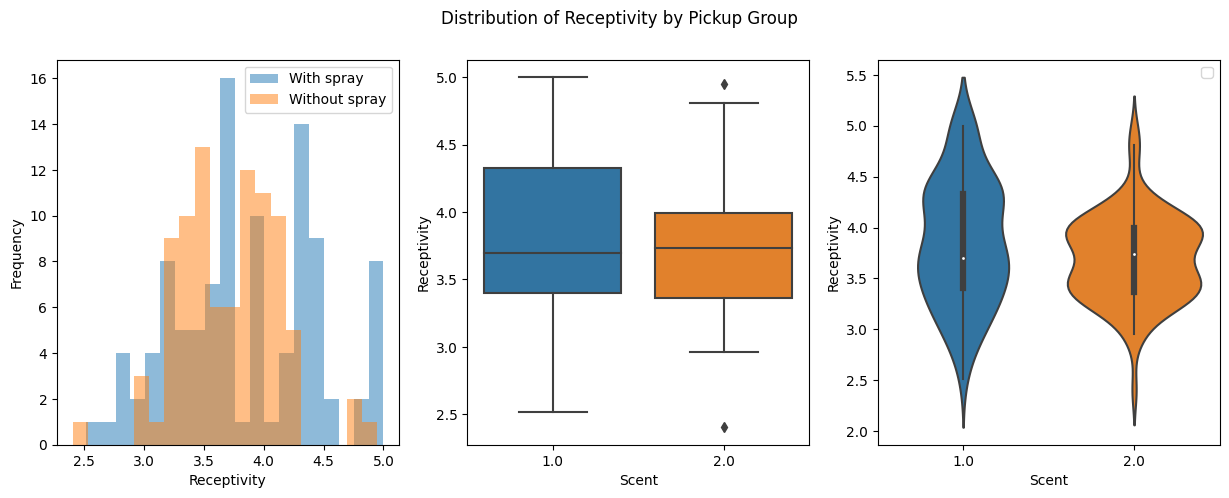

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

spray_data = Df[Df['Scent'] == 1.0]['Receptivity']
nospray_data = Df[Df['Scent'] == 2.0]['Receptivity']

sb.boxplot(data=Df, x='Scent', y='Receptivity', ax=ax[1])
sb.violinplot(data=Df, x='Scent', y='Receptivity', ax=ax[2])

# Create overlaid histogram plots
ax[0].hist(spray_data, bins=20, alpha=0.5, label='With spray')
ax[0].hist(nospray_data, bins=20, alpha=0.5, label='Without spray')

# Add labels and legend
ax[0].set_xlabel('Receptivity')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Show the plot
plt.suptitle('Distribution of Receptivity by Pickup Group')
plt.legend()

In [ ]:
receptivity_spray = Df[Df['Scent'] == 1]['Receptivity']
receptivity_no_spray = Df[Df['Scent'] == 2]['Receptivity']

statistic_spray, p_value_spray = shapiro(receptivity_spray)
print("Shapiro-Wilk test statistic for Spray:", statistic_spray)
print("P-value for Spray:", p_value_spray)

statistic_no_spray, p_value_no_spray = shapiro(receptivity_no_spray)
print("Shapiro-Wilk test statistic for No Spray:", statistic_no_spray)
print("P-value for No Spray:", p_value_no_spray)

Shapiro-Wilk test statistic for Spray: 0.9737378358840942
P-value for Spray: 0.036449555307626724
Shapiro-Wilk test statistic for No Spray: 0.9701603651046753
P-value for No Spray: 0.03629191964864731


The Shapiro-Wilk test results for both scent groups indicate that the p-values are less than the common significance level of 0.05. This suggests that the receptivity scores for both the Spray and No Spray groups are not normally distributed.

Since the normality assumption is not met, you might need to consider using non-parametric tests or transformations when analyzing the data related to scent and receptivity. Keep in mind that non-parametric tests are less sensitive to distributional assumptions and can be used when dealing with non-normally distributed data.

In [ ]:
cute_direct = Df[Df['PickUp'] == 1]['Receptivity']
direct_direct = Df[Df['PickUp'] == 2]['Receptivity']

statistic_cute, p_value_cute = shapiro(cute_direct)
print("Shapiro-Wilk test statistic for cute direct:", statistic_cute)
print("P-value for cute direct:", p_value_cute)

statistic_direct, p_value_direct = shapiro(direct_direct)
print("Shapiro-Wilk test statistic for direct direct:", statistic_direct)
print("P-value for direct direct:", p_value_direct)

Shapiro-Wilk test statistic for cute direct: 0.9578617215156555
P-value for cute direct: 0.000855224730912596
Shapiro-Wilk test statistic for direct direct: 0.9907622933387756
P-value for direct direct: 0.8713902235031128


`14. Are there any significant outliers?`

`Answer`

I plotted violinplots, boxplots and calculated z-score and found no datapoint to exceed the 75th quartile or 3 standard deviations, z > 3SD from the mean.

In [ ]:
mean_receptivity = Df['Scent'].mean()
std_receptivity = Df['Scent'].std()

# Calculate z-scores for 'Receptivity'
Df['Z_Score'] = (Df['Scent'] - mean_receptivity) / std_receptivity

# Set the z-score threshold for identifying outliers (e.g., 3)
z_score_threshold = 3

# Identify outliers based on z-scores
outliers = Df[abs(Df['Z_Score']) > z_score_threshold]

print("Identified Outliers:")
print(outliers)


Identified Outliers:
Empty DataFrame
Columns: [PickUp, Scent, Receptivity, Gender, Age, Ethnicity, YearInSchool, Receptivity_T, Z_Score]
Index: []


`15. How is your dependent variable distributed in each cell?`

PickUp Group 2.0:
Mean: 3.6544516216216207
Standard Deviation: 0.5587985168394703
Variance: 0.31225578242199187

PickUp Group 1.0:
Mean: 3.863434
Standard Deviation: 0.4988286831064828
Variance: 0.24883005508974784



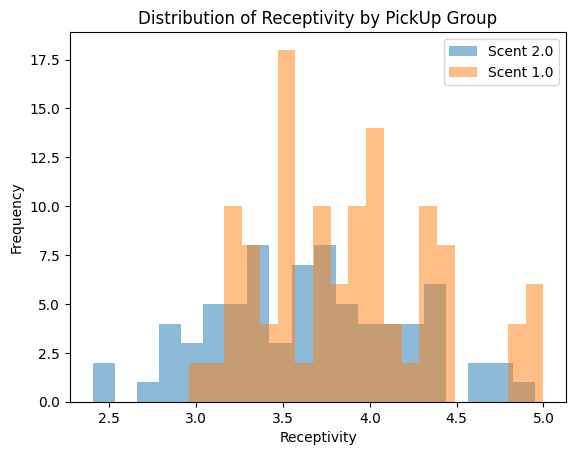

In [ ]:
# Calculate mean, standard deviation, and variance for each PickUp group
pickup_groups = Df['Scent'].unique()
for group in pickup_groups:
  group_data = Df[Df['PickUp'] == group]['Receptivity']
  group_mean = group_data.mean()
  group_std = group_data.std()
  group_var = group_data.var()

  print(f"PickUp Group {group}:")
  print(f"Mean: {group_mean}")
  print(f"Standard Deviation: {group_std}")
  print(f"Variance: {group_var}")
  print()

  # Create a histogram for each PickUp group
  plt.hist(group_data, bins=20, alpha=0.5, label=f'Scent {group}')

# Add labels and legend to the histogram
plt.xlabel('Receptivity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Receptivity by PickUp Group')
plt.show()


In [ ]:
# Calculate kurtosis for each PickUp group
pickup_groups = Df['Scent'].unique()
for group in pickup_groups:
  group_data = Df[Df['Scent'] == group]['Receptivity']
  kurt = kurtosis(group_data)
  print(f"Kurtosis for Scent {group}: {kurt}")

# Calculate coefficient of variation for each PickUp group
for group in pickup_groups:
  group_data = Df[Df['Scent'] == group]['Receptivity']
  coeff_var = variation(group_data)
  print(f"Coefficient of Variation for Scent {group}: {coeff_var}")


Kurtosis for Scent 2.0: 0.7428741000247499
Kurtosis for Scent 1.0: -0.7506884930759088
Coefficient of Variation for Scent 2.0: 0.11305772789160985
Coefficient of Variation for Scent 1.0: 0.15561331916621282


In [ ]:
spray = Df[Df.Scent == 1]['Receptivity']
nospray = Df[Df.Scent == 2]['Receptivity']

score, p = shapiro(spray)
print('Shapiro score:', score, '\np-value:', p)

score, p = shapiro(nospray)
print('Shapiro score:', score, '\np-value:', p)

Shapiro score: 0.9737378358840942 
p-value: 0.036449555307626724
Shapiro score: 0.9701603651046753 
p-value: 0.03629191964864731


`Answer`

The dependent variable itself has a skewed distribution as we have confirmed in Q5. But its distribution across the two independent Scent cells X1 and X2. it is bimodal when viewed at violinplot. This is even confirmed by the result of the Shapiro-Wilk test for both groups (S-W = 0.97, 0.036), and (S-W = 0.97, p = 0.03).


`16. Do you need to perform any transformations?`


`Answer`

I performed a boxcox transformation (lambda=0.3) on the dependent variable because I noticed that the Receptivity distribution is not normally distributed according to the Shapiro-Wilk test (S-W score = 0.98, p = 0.031 < (0.05)).  it was not normally distributed.

As for the independent variables, I did not see a need to transform the data but decided to compensate using non-parametric tests.

`17. Is there homogeneity or heterogeneity of variance?`

In [ ]:
# Perform Levene's test
scent = Df[Df['Scent'] == 1]['Receptivity']
noscent = Df[Df['Scent'] == 2]['Receptivity']

statistic, p_value = levene(scent, noscent, center='median')

print("Levene's test statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: Variances are not equal.")
else:
  print("Fail to reject the null hypothesis: Variances are equal.")

Levene's test statistic: 12.752531940774608
P-value: 0.00044934462474724294
Reject the null hypothesis: Variances are not equal.


`Answer`

By applying a Levene test using mean and median as centre, we transformed the Levene test to a Brown-Forscythe take into account the assumption of the effect of non-normality of the data. The resulting value is (Levene score=12.75, p = 0.0004 < (0.05)) which violates H0 considerably. The data is not homogeneous but heterogeneous.

`18. What is the mean score of receptivity in the experimental condition?
`

In [ ]:
Df[Df['Scent'] == 1.0]['Receptivity'].mean()
#print("Mean Receptivity in Experimental Condition:", mean_receptivity_experimental)

3.8568834615384615

`Answer` 3.85

`19. What is the mean score of receptivity in the control condition?`

In [ ]:
Df[Df['Scent'] == 2.0]['Receptivity'].mean()
#print("Mean Receptivity in Experimental Condition:", mean_receptivity_experimental)

3.6991735555555545

`Answer` 3.69

`20. What is your answer to RQ2? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions.`

In [ ]:
spray = Df[Df['Scent'] == 1]['Receptivity_T']
nospray = Df[Df['Scent'] == 2]['Receptivity_T']

# Assuming 'Df' is your DataFrame and 'Receptivity_T' is the transformed receptivity column
grouped_data = [spray, nospray]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: There is a significant difference between groups.")
else:
  print("Fail to reject the null hypothesis: No significant difference between groups.")

# Calculate degrees of freedom
df_between = len(grouped_data) - 1
df_within = len(Df['Receptivity_T']) - len(grouped_data)

# Calculate eta-squared (effect size)
ss_between = df_between * f_statistic / df_within
eta_squared = ss_between / (ss_between + f_statistic)

print("Degrees of freedom (between):", df_between)
print("Degrees of freedom (within):", df_within)
print("Eta-squared (effect size):", eta_squared)

One-way ANOVA results:
F-statistic: 3.5460159014207693
P-value: 0.06120069477592889
Fail to reject the null hypothesis: No significant difference between groups.
Degrees of freedom (between): 1
Degrees of freedom (within): 192
Eta-squared (effect size): 0.0051813471502590676


In [ ]:
# Perform Welch's ANOVA
welch_result = pg.welch_anova(data=Df, dv='Receptivity_T', between='Scent')

print("Welch's ANOVA results:")
print(welch_result)

Welch's ANOVA results:
  Source  ddof1       ddof2         F     p-unc       np2
0  Scent      1  185.622643  3.716648  0.055399  0.018134


VARIABLE DESCRIPTION

The dependent variable is the 'Receptivity' Y factor whose values are continuous. It describes the degree of willingness a prospective partner is willing to accept the proposing party.

The independent variable is the Scent factor whose values are discrete and binary. It has values, 'spray' X1 and 'no-spray' X2 which describes the method used by the proposing partner to attract his mate.

ASSUMPTIONS

Normality:- None of the variables involved exhibit a normal distribution. The Receptivity variable has a skewed distribution, as stated in the previous research. But the cells X1 and X2 exhibit a bimodal distribution, which is an apparent splitting of the mean. Their respective shapiro values are X1 = (S-W = 0.97, 0.036), X2 = (S-W = 0.97, p = 0.03). Notice their similarity in values, and they show no skewness.

Outliers:- Three methods were applied to test for outliers: violinplot, boxplots, and z-scores. The results were unanimously negative for outliers for Scent groups and Receptivity. z < 3SD.

Homogeneity: The Levene test was chosen to test for homogeneity of variance with median as the centre (Brown-Forsythe) because of the lack of normality. The result is that H0 failed, (L = 12.7, p = 0.00044). This means that we accept H1. The variance is heteroscedastic.

Independence: Like the previous research, I used the same parametric and non-parametric tests; Levene and Mann-Whitney U test. The results were similar in that the p-value = 0.06 > (0.05). This means that H0 is true. The mean between both groups is not significantly different. This also implies that even the bimodality of the distribution is similar.

ANOVA

I reached the resolution that the appearance of the normality of the distribution didn't meet expectations enough for me to use a One-Way ANOVA. so I tried a Welch ANOVA first and got the results (dof = 185.6, F = 3.71, p = 0.055, np2 = 0.005). But I tried the one-way ANOVA to comparison and confirmation purposes. The outcome was similar (dof = 192, F = 3.54, p = 0.06, np2 = 0.018).

CONCLUSION

I noticed that both ANOVA tests had values so close to the common alpha. Nonetheless I still accept it to be above the common alpha and subsequently go with H0. There is virtually little to no difference between the mean of both groups in the scent data. If we look at the effect size from the Welch ANOVA, we see a 1.8% difference in variation.

The answer to research question 2 is that based on my analysis, scent has little to no effect on receptivity .

###**RQ3: Is there any evidence to suggest that the impact of the androstadienone spray on attractiveness effect will be enhanced by the pick-up approach?**
---

`21. What is your dependent variable?`

Receptivity is the dependent variable. The main research question is about it. The goal of every pick up is to get a mate. Certain factors determine how the recepeint will respond. The factors involved are the independent variables.

`22. What is(are) your independent variable(s)?`

Scent and PickUp are the independent variables because according to the research question, they are being combined together to influence Receptivity.

`23. Are the scores in each cell independent?`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(Df['Scent'], Df['PickUp'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)


Chi-Square statistic: 1.288518157580657
P-value: 0.2563212150101907
Degrees of freedom: 1


`Answer`

I used a chi-square test for independence to generalize the irelationship between the PickUp and Scent groups. The results indicate that the Chi-Square statistic is 1.2885, the p-value is 0.2563. This suggests that there is no significant association between the "Scent" and "PickUp" variables in relation to "Receptivity."

In other words, based on this analysis, it appears that the distribution of "Receptivity" scores is not significantly influenced by the combination of "Scent" and "PickUp" variables.

`24. Are there any significant outliers?`

In the previous research questions, I used t-tests and U-tests to compare mean independence between both groups. For the PickUp group, there was a statistically significant difference, but for the Scent group, significance of independence was not found. This also impacted the ANOVA in almost opposite ways.

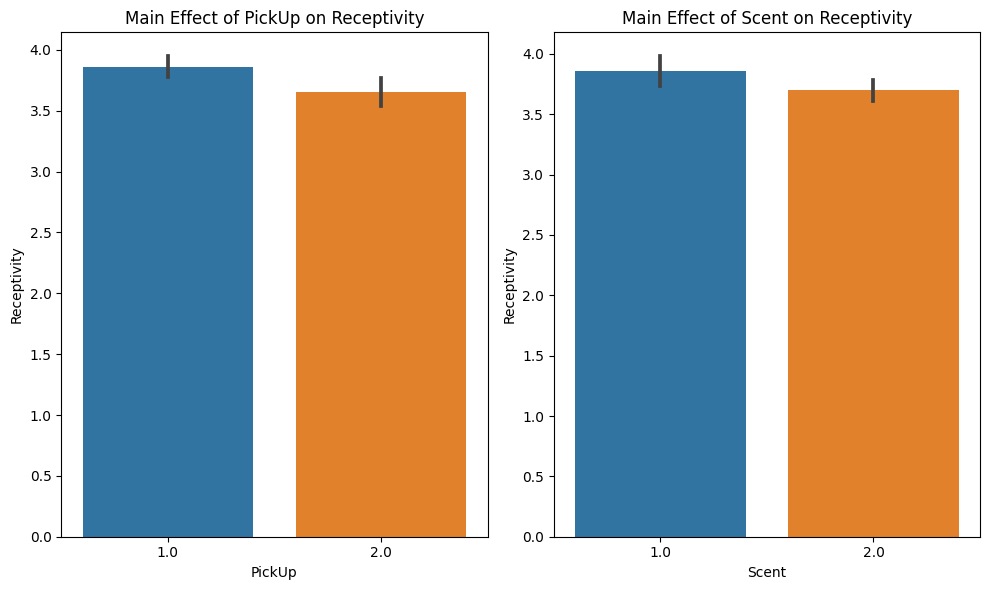

In [ ]:
# Create bar plots for main effects
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sb.barplot(x='PickUp', y='Receptivity', data=Df)
plt.title("Main Effect of PickUp on Receptivity")

plt.subplot(1, 2, 2)
sb.barplot(x='Scent', y='Receptivity', data=Df)
plt.title("Main Effect of Scent on Receptivity")

plt.tight_layout()
plt.show()


In [ ]:
mean_receptivity = Df['Receptivity'].mean()
std_receptivity = Df['Receptivity'].std()

# Calculate z-scores for 'Receptivity'
Df['Z_Score'] = (Df['Receptivity'] - mean_receptivity) / std_receptivity

# Set the z-score threshold for identifying outliers (e.g., 3)
z_score_threshold = 3

# Identify outliers based on z-scores
outliers = Df[abs(Df['Z_Score']) > z_score_threshold]

print("Identified Outliers:")
print(outliers)


Identified Outliers:
Empty DataFrame
Columns: [PickUp, Scent, Receptivity, Gender, Age, Ethnicity, YearInSchool, Receptivity_T, Z_Score]
Index: []


`Answer`

I drew violinplots, boxplots and calculated z-score and found no datapoint to exceed the 75th quartile or 3 standard deviations, z > 3SD from the mean.

`25. How is your dependent variable distributed in each cell?`

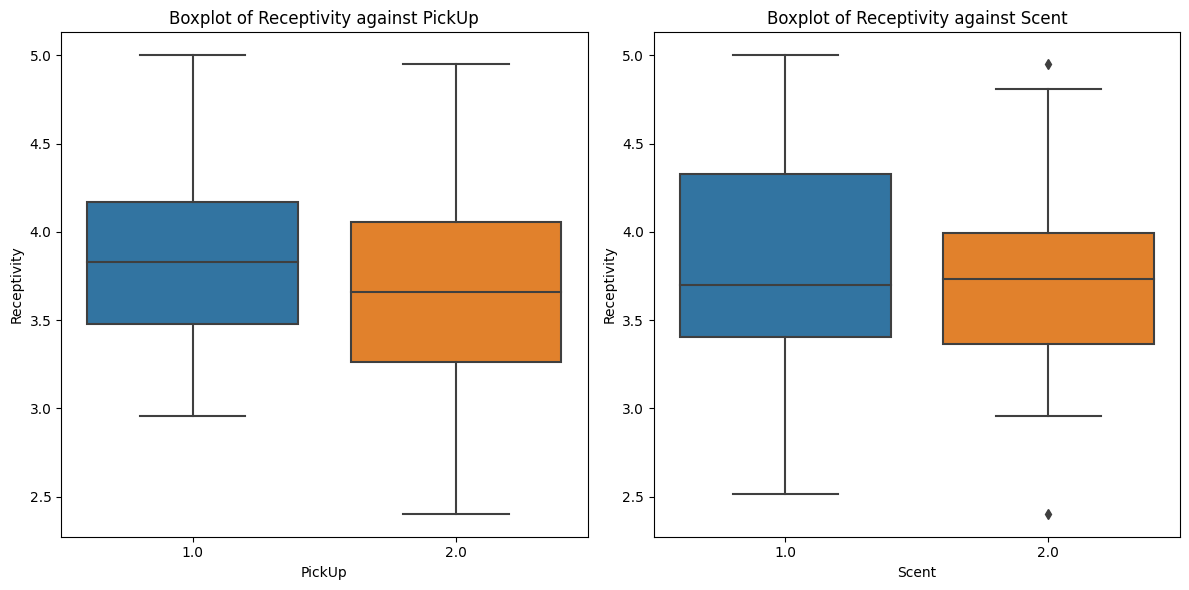

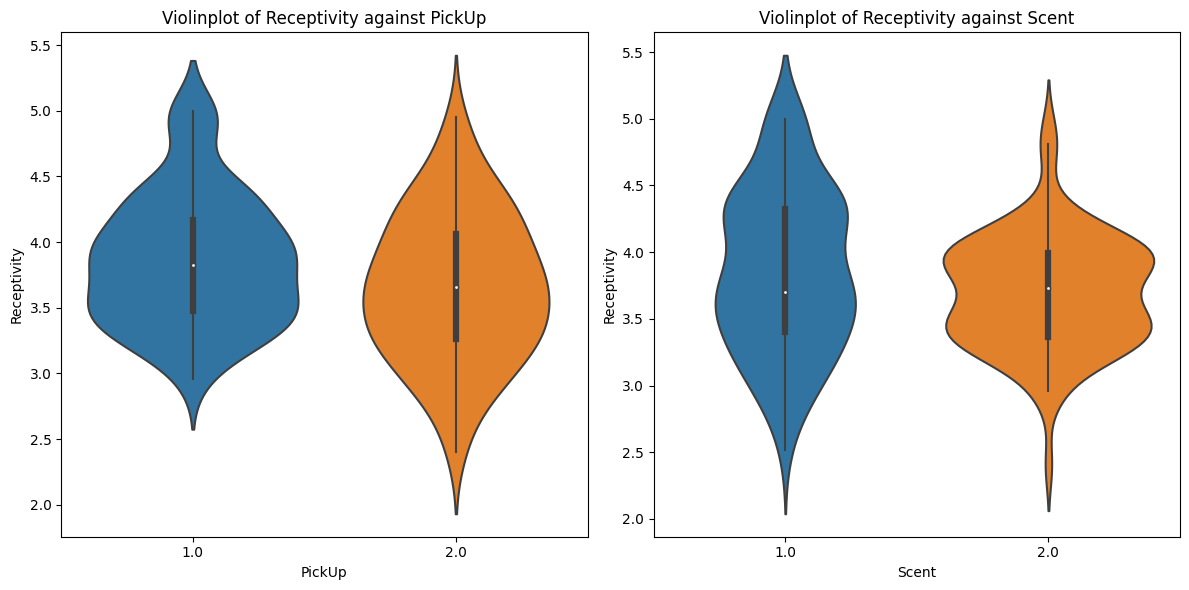

In [ ]:
# Create subplots for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for Receptivity against PickUp
sb.boxplot(x='PickUp', y='Receptivity', data=Df, ax=axes[0])
axes[0].set_title('Boxplot of Receptivity against PickUp')

# Boxplot for Receptivity against Scent
sb.boxplot(x='Scent', y='Receptivity', data=Df, ax=axes[1])
axes[1].set_title('Boxplot of Receptivity against Scent')

plt.tight_layout()
plt.show()

# Create subplots for the violin plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Violinplot for Receptivity against PickUp
sb.violinplot(x='PickUp', y='Receptivity', data=Df, ax=axes[0])
axes[0].set_title('Violinplot of Receptivity against PickUp')

# Violinplot for Receptivity against Scent
sb.violinplot(x='Scent', y='Receptivity', data=Df, ax=axes[1])
axes[1].set_title('Violinplot of Receptivity against Scent')

plt.tight_layout()
plt.show()


`Answer`

For the PickUp group, the distribution is skewed for the cute-direct group, but normal for the direct group according to the violinplot.

For the Scent group, both cells exhibit bimodal distribution according to the violinplot. Information about their normality value is in the previous research. Only the direct-direct group of the pickUp variable passed the normality test.

`26. Do you need to perform any transformations?`

I transformed the Receptivity variable, and I used a non-parametric test on the independent groups.

`27. Is there homogeneity or heterogeneity of variance?`

In [ ]:
# Perform Levene's test
scent = Df[Df['Scent'] == 1]['Receptivity_T']
noscent = Df[Df['Scent'] == 2]['Receptivity_T']

cute_direct = Df[Df['PickUp'] == 1]['Receptivity_T']
direct_direct = Df[Df['PickUp'] == 2]['Receptivity_T']

statistic, p_value = levene(scent, noscent, cute_direct, direct_direct, center='median')

print("Levene's test statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis: Variances are not equal.")
else:
  print("Fail to reject the null hypothesis: Variances are equal.")

Levene's test statistic: 4.756220900015777
P-value: 0.0028671233664495843
Reject the null hypothesis: Variances are not equal.


I carried out a levene test on all the groups involved and arrived at the score (L = 4.75, p = 0.002). H0 fails. Thus, H1 is accepted. The variance distribution is unequal.


`28. Is there any interaction between the two factors?`

 `Answer`

The p-value associated with PickUp and Scent in the ANOVA test is 0.0039 < 0.05. This means that H1 triumphs over H0 for the interaction between the two factors. It also means that there is asymmetry on the effects of PickUp and Scent and Receptivity for all levels. I conclude that the impact of the androstadienone spray on attractiveness effect is indeed influenced by the pick-up approach, and this relationship is statistically significant. I drew the interaction plot for confirmation. There was a crossover between the PickUp and Scent points.


The p-value associated with the interaction term "C(PickUp):C(Scent)" is **0.003923**. In hypothesis testing, if the p-value is below the chosen significance level (often denoted as α or alpha, typically 0.05), it suggests that there is evidence to reject the null hypothesis and conclude that the effect is statistically significant.

In this case, since the p-value (0.003923) is less than 0.05, it indicates that the interaction effect between PickUp and Scent is statistically significant. This means that the effect of PickUp on Receptivity is not the same for all levels of Scent, and the effect of Scent on Receptivity is not the same for all levels of PickUp. In other words, there is evidence to suggest that the impact of the androstadienone spray on attractiveness effect is indeed influenced by the pick-up approach, and this relationship is statistically significant.

<ipython-input-54-fe6e8a295b3c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.pointplot(data=Df, x="PickUp", y="Receptivity", hue="Scent", ci="sd")


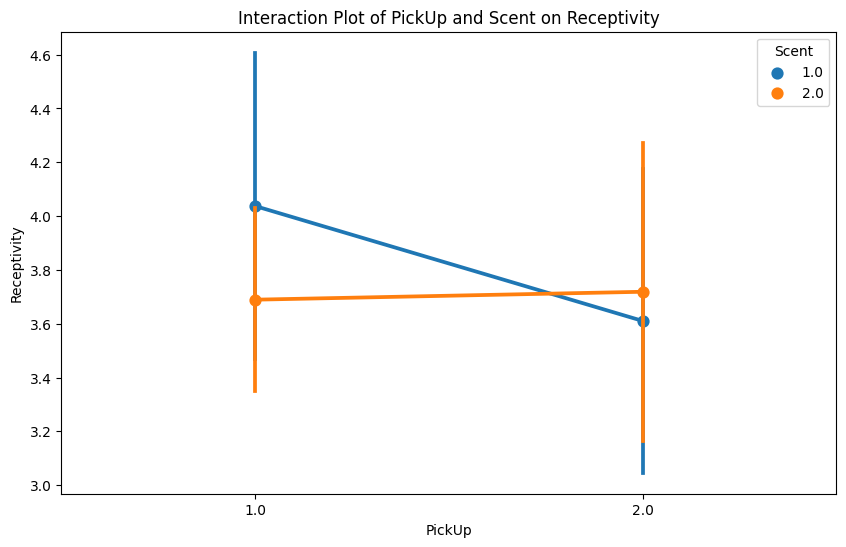

In [ ]:
# Create an interaction plot using seaborn
plt.figure(figsize=(10, 6))
sb.pointplot(data=Df, x="PickUp", y="Receptivity", hue="Scent", ci="sd")

# Set labels and title
plt.xlabel("PickUp")
plt.ylabel("Receptivity")
plt.title("Interaction Plot of PickUp and Scent on Receptivity")

# Show the plot
plt.legend(title="Scent")
plt.show()


`29. What is your answer to RQ3? Report on the findings (no less than 200 words). Don’t forget to mention the assumptions. You can use 2 instead of 2.`


In [ ]:
# Perform two-way ANOVA
model = ols('Receptivity_T ~ C(PickUp) * C(Scent)', data=Df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                      sum_sq     df         F    PR(>F)
C(PickUp)           0.432769    1.0  9.669759  0.002162
C(Scent)            0.224376    1.0  5.013454  0.026311
C(PickUp):C(Scent)  0.381603    1.0  8.526517  0.003923
Residual            8.503424  190.0       NaN       NaN


VARIABLE DESCRIPTION

The dependent variable is the 'Receptivity' Y feature whose values are continuous. It describes the degree of willingness a prospective partner is willing to accept the proposing party.

The independent variables are the PickUp and Scent variables influence receptivity.

ASSUMPTIONS

Normality:- Generally, the p-values of both PickUp and Normality are 20 orders of magnitude less than the standard alpha, 0.05 according to the Shapiro test. They are not normally distributed. Although as seen in the previous research questions, none of the cells pass the normality test except the direct-direct group in the PickUp variable

Outliers:- Three methods were applied to test for outliers: violinplot, boxplots, and z-scores. The results were unanimously negative for outliers for PickUp groups and Receptivity. z < 3SD.

Homogeneity: The Levene (Brown-Forsythe) test was chosen to test for homogeneity of variance for all the cells together. The result was (L = 4.75, p = 0.002 < (0.05)).  I carried out a levene test on all the groups involved and arrived at the score (L = 4.75, p = 0.002). Thus we accept H1 and reject H0. The variance is herteroscedatic or unequal.

Independence: I used a chi-square test for independence to generalize the irelationship between the PickUp and Scent groups. The results indicate that the Chi-Square statistic is 1.2885, the p-value is 0.2563. This suggests that there is no significant association between the "Scent" and "PickUp" variables in relation to "Receptivity."

ANALYSIS OF VARIANCE

Finally, I decided to apply the two-way ANOVA to the data and the result:
Main effect:- The main effect of PickUp is (F = 9.67, p = 0.0002). This indicates that there is a significant difference in the means of the Receptivity_T variable between the different levels of the PickUp factor. The main effect of the Scent variable is also statistically significant (F = 5.01, p = 0.026). This suggests that there is a significant difference in the means of the Receptivity_T variable between the different levels of the Scent factor.
Interaction Effect: The interaction effect between PickUp and Scent is statistically significant (F = 8.57, 0.0039). This indicates that the impact of PickUp on Receptivity_T is not consistent across different levels of Scent, and vice versa. In other words, there is a combined effect of PickUp and Scent on the Receptivity_T variable.
Effect Size:- I use partial eta-squared to compute effect size. The effect size for the interaction factor is 0.043 or 4.3%. PickUp and Scent have effect sizes of 0.048 and 0.025 respectively.

CONCLUSION

The p-values of our two-way ANOVA, show that scent has an impact on the PickUp approach, but the effect sizes of the interactions show that to be of medium impact.

The answer to this research question is that spray will lead to more relationship receptivity.


In [ ]:
score, p = shapiro(Df['PickUp'])
print('Shapiro score', score)
print('p-value', p)

score, p = shapiro(Df['Scent'])
print('Shapiro score', score)
print('p-value', p)

Shapiro score 0.6156524419784546
p-value 1.2224234227641331e-20
Shapiro score 0.6345351934432983
p-value 3.5819844736258444e-20


`30. Answer the main research question by taking the above findings into account (no less than 200 words). Don’t forget to mention the assumptions.`

RESEARCH QUESTION 1

The skewness of the cute-direct approach has an impact as it pulled the mean toward increased receptivity unlike the direct-direct approach. This is also confirmed in the result of the t-test. It is possible that the cute-direct also caused the skewness and non-normality of the Receptivity distribution. It is not unexpected from the t-test that the ANOVA test will favour the cute-direct approach even in the absence of outliers, albeit with moderate effect size. Whatever the case, the cute-direct approach triumphed.

RESEARCH QUESTION 2

The distribution of both groups in the Scent factor does not satisfy the requirements for a normal distribution. They tend to follow a bimodal curve, which somewhat indicates a combination of two means entending to the other quartiles, probably caused by the other factors not discussed within the scope of this research. It is likely that it had some influence on the t-statistic which resulted in no difference between the means of either group. As a result, it is assumed that scent (on its own) does not have a meaningful effect on a proponent's approach to his/her desired partner.

RESEARCH QUESTION 3

Since it seemed from the outcom of RQ2 that scent by itself does not indicate an increase or decrease in receptiveness of partners perhaps due to other unnamed conditions or deviations from normality or homoscedasticity, it may have an indirect effect on the approach thereby impacting the receptiveness. The results from the two-way ANOVA tell us that there is significant link or power scent may have on the approach. As a guess, a good spray should increase the receptiveness of both sides but it will showed in or analysis to be more effective on the cute-direct approach albeit not with the strongest effect size.

OTHER FACTORS AND CONCLUSION

This analysis is limited to three features in the dataset: receptivity which is the dependent variable, and pick up line and perfume scent which are the predictors. In real life we know that other factors influence receptivity. Some of them are part of the dataset. Gender, age, race, ethnicity could have a linear orn non-linear effect on receptivity to varying degrees. if we do some tests and we see that age and race has way more power than scent or pickup, then we will arrive at values that will imply that scent and pickup approaches don't matter statistically. But the scope of our analysis involve immediate approach, and basic things like scent and pickup approach generate first impressions regardless of the background and prejudices of the potential couples involved.

In conclusion, after addressing all the assumptions in the dataset as required by the research including normality, homogeneity, outliers, and independence, and taking measures to mitigate their effect through transformations and non-parametric tests, I believe that scent has a role in increasing the receptiveness of a potential partner, and applying spray and using the cutedirect increases the proponents chances of attracting a date.

In [ ]:
Df.head()

,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Receptivity_T,Z_Score
0,1.0,2.0,3.25424,2.0,21.0,4.0,2.0,1.454963,-0.997263
1,1.0,1.0,4.43760,2.0,19.0,4.0,3.0,1.945816,1.231572
2,1.0,1.0,4.43760,2.0,21.0,4.0,1.0,1.945816,1.231572
3,1.0,1.0,3.91988,2.0,19.0,4.0,3.0,1.743193,0.256456
4,2.0,2.0,3.99384,2.0,20.0,1.0,2.0,1.773175,0.395759
